dict_keys(['__header__', '__version__', '__globals__', 'structural', 'funloc', 'masks', 'prior', 'labels', 'Y', 'X', 'description'])
['primary.nii', 'lh.V1d.nii', 'lh.V1v.nii', 'lh.V2d.nii', 'lh.V2v.nii', 'lh.V3d.nii', 'lh.V3v.nii', 'rh.V1d.nii', 'rh.V1v.nii', 'rh.V2d.nii', 'rh.V2v.nii', 'rh.V3d.nii', 'rh.V3v.nii']
['X: presented 28 x 28 images; Y: measured brain activity; prior: image prior; structural: structural MRI; funloc: localizer names; masks: localizer masks']
(100, 784)
(100, 3092)
(13,)
(110, 110, 37)
(110, 110, 37)
(2000, 784)


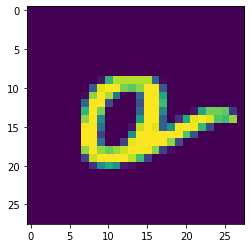

In [16]:
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt


dataset = loadmat('handwritten_digits_in_fmri_dataset/69dataset.mat')
print(dataset.keys())
funloc = [list(name)[0] for name in dataset['funloc'][0]]
print(funloc)
print(dataset['description'])
print(dataset['X'].shape)
print(dataset['Y'].shape)
print(dataset['masks'][0].shape) # 13 masks total
print(dataset['masks'][0][0].shape) # the masks are for the structural image
print(dataset['structural'].shape)
print(dataset['prior'].shape)
plt.imshow(dataset['prior'][1500].reshape((28, 28)))


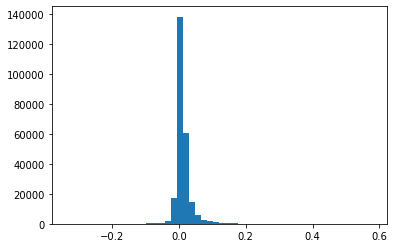

In [17]:
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt

model_name = 'digits_encoder_test5'

# Load data
dataset = loadmat('handwritten_digits_in_fmri_dataset/69dataset_split.mat')
NUM_VOXELS = dataset['y_test'].shape[1]
y_test = dataset['y_test']
y_train =  dataset['y_train']
plt.hist(y_train.flatten(), bins=50)
plt.show()
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test  = scaler.transform(y_test)

# mm = MinMaxScaler(feature_range=(-1, 1))
# y_train = mm.fit_transform(y_train)
# y_test  = mm.transform(y_test)
# plt.hist(y_train.flatten(), bins=50)
# plt.figure()
# plt.hist(y_test.flatten(), bins=50)
# plt.show()
# print(NUM_VOXELS)

In [18]:
from fmri_models import *

# Load Model and make predictions
model = CapsEncoder(num_voxels=NUM_VOXELS)
print(model.class_name)
model.load_weights('models/' + model_name + '/model_weights')

CapsEncoder


In [19]:
import numpy as np

y_pred = model.predict(dataset['x_test'])
y_train_pred = model.predict(dataset['x_train'])
np.savetxt('models/' + model_name + '/y_pred.csv', y_pred)
np.savetxt('models/' + model_name + '/y_train_pred.csv', y_train_pred)

# y_pred = np.loadtxt('models/' + model_name + '/y_pred.csv')
# y_train_pred = np.loadtxt('models/' + model_name + '/y_train_pred.csv')

In [20]:
from scipy import stats
import tensorflow_probability as tfp

# Get correlations
voxel_corr = []
correlation = []
for i in range(NUM_VOXELS):
    voxel_corr.append(stats.pearsonr(y_pred[:, i], y_test[:, i])[0])
for i in range(y_test.shape[0]):
    correlation.append(stats.pearsonr(y_test[i], y_pred[i])[0]) # returns correlation coefficient r and two tailed p-value

print('Mean Sample Correlation: ', np.mean(correlation))

print('Mean Voxel Correlation: ', np.mean(voxel_corr))

Mean Sample Correlation:  0.23523657825096964
Mean Voxel Correlation:  0.1884137294194035


In [21]:
dataset = loadmat('handwritten_digits_in_fmri_dataset/69dataset.mat')
print(dataset['description'])
print(dataset.keys())
m_names = dataset['funloc'][0] #  names of functional  masks
masks = dataset['masks'][0] # 3d mri masks
y = dataset['Y'] # 1D vectors of voxel activation for each sampe
mri = dataset['structural']  # 3d mri volume
prior = dataset['prior'] # mnist  image priors used for recon
print(prior.shape)
print(mri.shape)
print(masks.shape)
print(masks[0].shape)
print(y.shape)
print(m_names.shape)

['X: presented 28 x 28 images; Y: measured brain activity; prior: image prior; structural: structural MRI; funloc: localizer names; masks: localizer masks']
dict_keys(['__header__', '__version__', '__globals__', 'structural', 'funloc', 'masks', 'prior', 'labels', 'Y', 'X', 'description'])
(2000, 784)
(110, 110, 37)
(13,)
(110, 110, 37)
(100, 3092)
(13,)


In [22]:
import matplotlib.pyplot as plt
mean = np.mean(y_train, axis=0)
diff = np.subtract(y_train, mean)
diff_mean = np.mean(abs(diff), axis=0)

diff = np.subtract(y_train_pred, mean)
diff_mean_2 = np.mean(abs(diff), axis=0)

diff = np.subtract(y_pred, mean)
diff_mean_3 = np.mean(abs(diff), axis=0)

print(np.mean(diff_mean))
print(np.mean(diff_mean_2))
print(np.mean(diff_mean_3))

stds = np.std(y_pred, axis=0)
print(np.mean(stds))
# plt.hist(diff_mean)
# plt.title('actual')
# plt.figure()
# plt.hist(diff_mean_2)
# plt.title('pred')
# plt.show()


0.7897168
0.3364005
0.31770033
0.36953613


0.7891617793720184


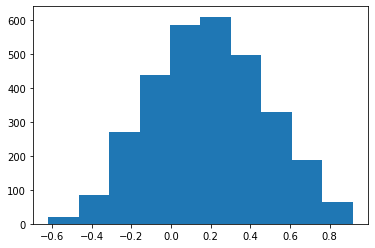

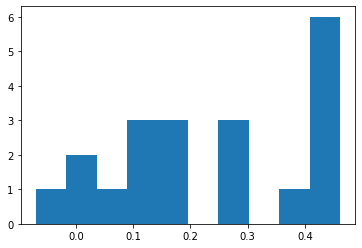

In [23]:
vc_sorted = np.sort(voxel_corr)
print(np.mean(vc_sorted[-100:]))
plt.hist(voxel_corr)
plt.figure()
plt.hist(correlation)
plt.show()

(3092,)


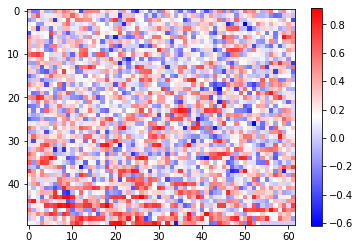

In [24]:
voxel_corr_2d = np.array(voxel_corr)
print(voxel_corr_2d.shape)
voxel_corr_2d.resize(3100)
voxel_corr_2d  = np.reshape(voxel_corr_2d, (50, 62))
plt.imshow(voxel_corr_2d, cmap='bwr')
plt.colorbar()
plt.show()

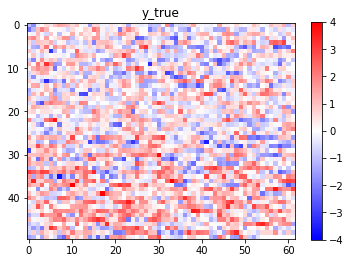

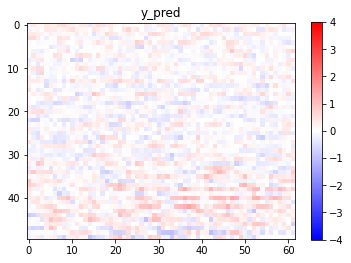

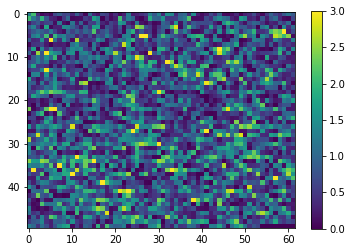

In [25]:
y_t_s2d  = y_test[0].copy()
y_t_s2d.resize(3100)
y_t_s2d = y_t_s2d.reshape((50,  62))

y_p_s2d  = y_pred[0].copy()
y_p_s2d.resize(3100)
y_p_s2d = y_p_s2d.reshape((50,  62))

plt.imshow(y_t_s2d, cmap='bwr')
plt.clim(-4, 4)
plt.colorbar()
plt.title('y_true')
plt.figure()
plt.imshow(y_p_s2d, cmap='bwr')
plt.title('y_pred')
plt.colorbar()
plt.clim(-4, 4)
plt.figure()
plt.imshow(abs(np.subtract(y_t_s2d,  y_p_s2d)))
plt.clim(-0, 3)
plt.colorbar()
plt.show()

dict_keys(['loss', 'mse', 'cosine_similarity', 'mae', 'val_loss', 'val_mse', 'val_cosine_similarity', 'val_mae', 'lr'])


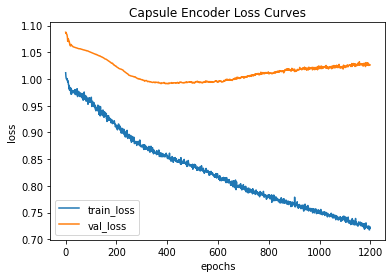

In [29]:
import json
with open('models/' + model_name + '/train-history.json', 'r')  as file:
    hist = json.load(file)

print(hist.keys())
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Capsule Encoder Loss Curves')
#plt.ylim(1.1, 1.2)
plt.savefig('/Users/scarere/Downloads/c_loss.png')
